In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.preprocessing import StandardScaler
from functools import reduce  
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from auxiliary_files.auxiliary_plots import * 
from auxiliary_files.auxiliary_analysis import * 
from auxiliary_files.auxiliary_tables import *

# 1. High Dimensionality, No Multicollinearity, Varying Sparsity

In [3]:
non_zero_betas = [5, 10, 20, 30, 35]
zero_betas = [30, 25, 15, 5, 0]
size_non_zero = 2

true_betas_list = generate_true_betas(non_zero_betas, zero_betas, size_non_zero)

In [4]:
np.random.seed(900)

n = 30
p = 35
cor_factor = 0 # we have not introduced multicollinearity yet. 
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []


for i in true_betas_list: 
        
    y_test, X_test, df_test= get_sim_data(n, p, cor_factor, i) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)
    

df_predictions_case_1_5 = get_predictions(n, p, true_betas_list[0], cor_factor, iterations, alphas, store_X_test[0])
df_predictions_case_1_10 = get_predictions(n, p, true_betas_list[1], cor_factor, iterations, alphas, store_X_test[1])
df_predictions_case_1_20 = get_predictions(n, p, true_betas_list[2], cor_factor, iterations, alphas, store_X_test[2])
df_predictions_case_1_30 = get_predictions(n, p, true_betas_list[3], cor_factor, iterations, alphas, store_X_test[3])
df_predictions_case_1_35 = get_predictions(n, p, true_betas_list[4], cor_factor, iterations, alphas, store_X_test[4])



In [5]:
store_mse_case_1_5, store_variance_case_1_5, store_bias_sq_case_1_5 = compute_mse(df_predictions_case_1_5, store_y_test[0], iterations)
store_mse_case_1_10, store_variance_case_1_10, store_bias_sq_case_1_10 = compute_mse(df_predictions_case_1_10, store_y_test[1], iterations)
store_mse_case_1_20, store_variance_case_1_20, store_bias_sq_case_1_20 = compute_mse(df_predictions_case_1_20, store_y_test[2], iterations)
store_mse_case_1_30, store_variance_case_1_30, store_bias_sq_case_1_30 = compute_mse(df_predictions_case_1_30, store_y_test[3], iterations)
store_mse_case_1_35, store_variance_case_1_35, store_bias_sq_case_1_35 = compute_mse(df_predictions_case_1_35, store_y_test[4], iterations)

In [6]:
# lasso does best, which is what we expect!

#for i in store_mse_case_1_5: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))


In [7]:
# lasso does best, which is what we expect!

for i in store_mse_case_1_10: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))


12.543674012019405 0.3489101213406774 141
5.903202553744391 0.03872038781812557 103
10.182073639411025 0.0003001835813575589 19
8.759536147085697 0.01933891750455232 91
7.421212303358962 0.025826187606826773 96


In [8]:
# lasso starts doing not so well as sparsity decreases. Here, one of the elastic net models would be best. 

for i in store_mse_case_1_20: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))


23.894818675387025 0.3489101213406774 141
24.090341930569554 0.00045005576757004977 26
21.36041182993634 0.00045005576757004977 26
21.686878385127415 0.0005672426068491978 30
22.379635965038165 0.0005672426068491978 30


In [9]:
# lasso starts doing not so well as sparsity decreases. Here, one of the elastic net models would be best. 

#for i in store_mse_case_1_30: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))



In [10]:
# ridge does best as we would expect!

for i in store_mse_case_1_35: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

36.0744567030203 0.5872786613189482 150
60.17020876915898 0.0003180625692794119 20
40.36581850751137 0.018251834943190444 90
46.96128315783719 0.0007575250258771912 35
52.04609512071966 0.0006010276782070381 31


# 2. Low Dimensionality, Moderate to High Multicollineary, Varying Sparsity

In [11]:
non_zero_betas_2 = [3, 5, 6, 7, 10]
zero_betas_2 = [7, 5, 4, 3, 0]
size_non_zero = 2

true_betas_list_2 = generate_true_betas(non_zero_betas_2, zero_betas_2, size_non_zero)


In [12]:
np.random.seed(900)

n = 30
p = 10
cor_factor = 0.8 
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []


for i in true_betas_list_2: 
        
    y_test, X_test, df_test= get_sim_data(n, p, cor_factor, i) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)
    

df_predictions_case_2_3 = get_predictions(n, p, true_betas_list_2[0], cor_factor, iterations, alphas, store_X_test[0])
df_predictions_case_2_5 = get_predictions(n, p, true_betas_list_2[1], cor_factor, iterations, alphas, store_X_test[1])
df_predictions_case_2_6 = get_predictions(n, p, true_betas_list_2[2], cor_factor, iterations, alphas, store_X_test[2])
df_predictions_case_2_7 = get_predictions(n, p, true_betas_list_2[3], cor_factor, iterations, alphas, store_X_test[3])
df_predictions_case_2_10 = get_predictions(n, p, true_betas_list_2[4], cor_factor, iterations, alphas, store_X_test[4])



In [13]:
store_mse_case_2_3, store_variance_case_2_3, store_bias_sq_case_2_3 = compute_mse(df_predictions_case_2_3, store_y_test[0], iterations)
store_mse_case_2_5, store_variance_case_2_5, store_bias_sq_case_2_5 = compute_mse(df_predictions_case_2_5, store_y_test[1], iterations)
store_mse_case_2_6, store_variance_case_2_6, store_bias_sq_case_2_6 = compute_mse(df_predictions_case_2_6, store_y_test[2], iterations)
store_mse_case_2_7, store_variance_case_2_7, store_bias_sq_case_2_7 = compute_mse(df_predictions_case_2_7, store_y_test[3], iterations)
store_mse_case_2_10, store_variance_case_2_10, store_bias_sq_case_2_10 = compute_mse(df_predictions_case_2_10, store_y_test[4], iterations)

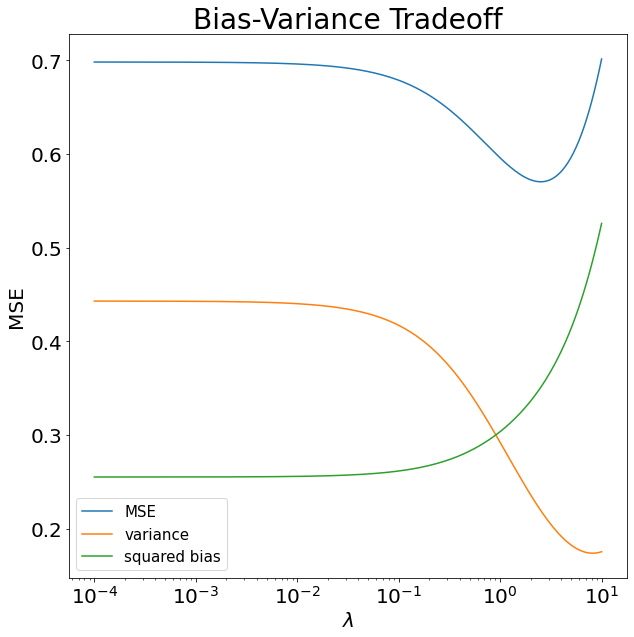

In [14]:
bias_var_tradeoff(alphas, store_mse_case_2_3[0], store_variance_case_2_3[0], store_bias_sq_case_2_3[0])

In [15]:
# naive elastic net with L1_ratio of 0.7 works best due to high degree of pairwise correlation

for i in store_mse_case_2_3: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.5703931985552084 2.4945081352303164 175
0.6074652841180656 0.04605922041145108 106
0.5716626424916842 0.07752597488629465 115
0.5769390653348312 0.073168071434272 114
0.5518238460909465 0.7401959996915645 154


In [16]:
# naive elastic net with L1_ratio of 0.7 works best due to high degree of pairwise correlation

#for i in store_mse_case_2_5: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [17]:
# lasso does best here (naive elastic net fails despite high pairwise correlation). 

#for i in store_mse_case_2_6: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [18]:
# naive elastic net with L1_ratio of 0.7 works best due to high degree of pairwise correlation 

for i in store_mse_case_2_7: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.2698842216431751 1.9791668678535574 171
0.29752310018936234 0.2072921779595372 132
0.2648188839540474 0.08703591361485166 117
0.24571522201177226 0.2465811075822604 135
0.21781489512742527 0.3696912707195028 142


In [19]:
# ridge does best because of zero sparsity. 

for i in store_mse_case_2_10: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

1.1400072512415527 0.29331662783900453 138
1.1663384501815308 0.0001 0
1.149327159830785 0.009115888299750819 78
1.163597480028371 0.004552935074866948 66
1.166022067453524 0.0001 0


# 3. Low Dimensionality, High Sparsity, Varying Degrees of Multicollineary 

In [20]:
np.random.seed(210)

n = 20 
p = 8 
true_betas = [3, 1.5, 0, 0, 2, 0, 0, 0]
cor_factor = [0, 0.1, 0.3, 0.5, 0.7, 0.8]
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []


for i in cor_factor: 

    y_test, X_test, df_test= get_sim_data(n, p, i, true_betas) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)

df_predictions_case_3_1 = get_predictions(n, p, true_betas, cor_factor[0], iterations, alphas, store_X_test[0])
df_predictions_case_3_2 = get_predictions(n, p, true_betas, cor_factor[1], iterations, alphas, store_X_test[1])
df_predictions_case_3_3 = get_predictions(n, p, true_betas, cor_factor[2], iterations, alphas, store_X_test[2])
df_predictions_case_3_4 = get_predictions(n, p, true_betas, cor_factor[3], iterations, alphas, store_X_test[3])
df_predictions_case_3_5 = get_predictions(n, p, true_betas, cor_factor[4], iterations, alphas, store_X_test[4])
df_predictions_case_3_6 = get_predictions(n, p, true_betas, cor_factor[5], iterations, alphas, store_X_test[5])


In [21]:
store_mse_case_3_1, store_variance_case_3_1, store_bias_sq_case_3_1 = compute_mse(df_predictions_case_3_1, store_y_test[0], iterations)
store_mse_case_3_2, store_variance_case_3_2, store_bias_sq_case_3_2 = compute_mse(df_predictions_case_3_2, store_y_test[1], iterations)
store_mse_case_3_3, store_variance_case_3_3, store_bias_sq_case_3_3 = compute_mse(df_predictions_case_3_3, store_y_test[2], iterations)
store_mse_case_3_4, store_variance_case_3_4, store_bias_sq_case_3_4 = compute_mse(df_predictions_case_3_4, store_y_test[3], iterations)
store_mse_case_3_5, store_variance_case_3_5, store_bias_sq_case_3_5 = compute_mse(df_predictions_case_3_5, store_y_test[4], iterations)
store_mse_case_3_6, store_variance_case_3_6, store_bias_sq_case_3_6 = compute_mse(df_predictions_case_3_6, store_y_test[5], iterations)

In [22]:
# 0

#for i in store_mse_case_3_1: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [23]:
# 0.1

for i in store_mse_case_3_2: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

1.2380474762671343 0.6222570836730231 151
0.5989540600341798 0.13826221737646563 125
1.160345900187367 0.04605922041145108 106
0.9793690331635143 0.0821434358491943 116
0.8277329228882556 0.10353218432956626 120


In [24]:
# 0.3

for i in store_mse_case_3_3: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

2.0706833810097005 0.16446761779946645 128
1.3398163289517586 0.2072921779595372 132
2.0337815376364103 0.01933891750455232 91
1.8967791340267053 0.04880251583654434 107
1.723655168568804 0.09221978823334331 118


In [25]:
# 0.5
#only setting where elastic net outperforms lasso and ridge.

for i in store_mse_case_3_4: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.6754013861143037 1.8679135990207847 170
0.6269705722939336 0.2465811075822604 135
0.631904903217388 0.10353218432956626 120
0.5794044196240361 0.13826221737646563 125
0.5660720725963433 0.16446761779946645 128


In [26]:
# 0.7

for i in store_mse_case_3_5: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.9047012166206374 0.6222570836730231 151
0.8286202879153189 0.06150985788580504 111
0.8893109032297652 0.0344896226040576 101
0.8644077122487904 0.043470131581250265 105
0.8505712698861405 0.04880251583654434 107


In [27]:
# 0.8
#for i in store_mse_case_3_6: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

# 4. Same in Case 3, but all betas are set to 0.85

In [28]:
"""ridge should do best here in all cases"""

np.random.seed(123)

n = 20 
p = 8 
true_betas = np.repeat(0.85, 8)
cor_factor = [0, 0.1, 0.3, 0.5, 0.7, 0.8]
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []


for i in cor_factor: 

    y_test, X_test, df_test= get_sim_data(n, p, i, true_betas) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)

df_predictions_case_4_1 = get_predictions(n, p, true_betas, cor_factor[0], iterations, alphas, store_X_test[0])
df_predictions_case_4_2 = get_predictions(n, p, true_betas, cor_factor[1], iterations, alphas, store_X_test[1])
df_predictions_case_4_3 = get_predictions(n, p, true_betas, cor_factor[2], iterations, alphas, store_X_test[2])
df_predictions_case_4_4 = get_predictions(n, p, true_betas, cor_factor[3], iterations, alphas, store_X_test[3])
df_predictions_case_4_5 = get_predictions(n, p, true_betas, cor_factor[4], iterations, alphas, store_X_test[4])
df_predictions_case_4_6 = get_predictions(n, p, true_betas, cor_factor[5], iterations, alphas, store_X_test[5])


In [29]:
store_mse_case_4_1, store_variance_case_4_1, store_bias_sq_case_4_1 = compute_mse(df_predictions_case_4_1, store_y_test[0], iterations)
store_mse_case_4_2, store_variance_case_4_2, store_bias_sq_case_4_2 = compute_mse(df_predictions_case_4_2, store_y_test[1], iterations)
store_mse_case_4_3, store_variance_case_4_3, store_bias_sq_case_4_3 = compute_mse(df_predictions_case_4_3, store_y_test[2], iterations)
store_mse_case_4_4, store_variance_case_4_4, store_bias_sq_case_4_4 = compute_mse(df_predictions_case_4_4, store_y_test[3], iterations)
store_mse_case_4_5, store_variance_case_4_5, store_bias_sq_case_4_5 = compute_mse(df_predictions_case_4_5, store_y_test[4], iterations)
store_mse_case_4_6, store_variance_case_4_6, store_bias_sq_case_4_6 = compute_mse(df_predictions_case_4_6, store_y_test[5], iterations)


In [30]:
#ridge fails to outperform all other models. Not sure why in this case.

#for i in store_mse_case_4_1: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [31]:
#ridge does best! 

for i in store_mse_case_4_2: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

2.4708848617041204 0.7842822061337682 155
2.547768294838287 0.0001 0
2.506256624737217 0.025826187606826773 96
2.5418651874153566 0.009658832241158708 79
2.5475430695676624 0.0001 0


In [32]:
#ridge does best! 

for i in store_mse_case_4_3: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.5214577708046586 10.0 199
1.532239001309111 0.23272024789604098 134
0.585327762543371 0.698587974678525 153
0.8819700161134203 0.4937047852839004 147
1.1238047450280437 0.39171014908092605 143


In [33]:
#ridge does best! 

#for i in store_mse_case_4_4: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [34]:
#ridge does best! 

for i in store_mse_case_4_5: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

0.7364908724774366 1.4820207057988601 166
0.9055901649901404 0.010843659686896108 81
0.7721661835330006 0.06517339604882427 112
0.8317379452284769 0.043470131581250265 105
0.8669102900869129 0.02899422853882878 98


In [35]:
#ridge does best! 

#0.8

#for i in store_mse_case_4_6: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

# 5. High Dimensionality, High Sparsity, Varying Multicollinearity

In [36]:
np.random.seed(190)

non_zero_betas = [10]
zero_betas = [25]
size_non_zero = 2
true_betas_hd = generate_true_betas(non_zero_betas, zero_betas, size_non_zero)

n = 30
p = 35 
cor_factor = [0, 0.1, 0.3, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]
iterations = 500
alphas = np.logspace(-4,1,200)

store_X_test = []
store_y_test = []

for i in cor_factor: 

    y_test, X_test, df_test= get_sim_data(n, p, i, true_betas_hd[0]) # get training data
    store_X_test.append(X_test)
    store_y_test.append(y_test)

df_predictions_case_5_1 = get_predictions(n, p, true_betas_hd[0], cor_factor[0], iterations, alphas, store_X_test[0])
df_predictions_case_5_2 = get_predictions(n, p, true_betas_hd[0], cor_factor[1], iterations, alphas, store_X_test[1])
df_predictions_case_5_3 = get_predictions(n, p, true_betas_hd[0], cor_factor[2], iterations, alphas, store_X_test[2])
df_predictions_case_5_4 = get_predictions(n, p, true_betas_hd[0], cor_factor[3], iterations, alphas, store_X_test[3])
df_predictions_case_5_5 = get_predictions(n, p, true_betas_hd[0], cor_factor[4], iterations, alphas, store_X_test[4])
df_predictions_case_5_6 = get_predictions(n, p, true_betas_hd[0], cor_factor[5], iterations, alphas, store_X_test[5])
df_predictions_case_5_7 = get_predictions(n, p, true_betas_hd[0], cor_factor[6], iterations, alphas, store_X_test[6])
df_predictions_case_5_8 = get_predictions(n, p, true_betas_hd[0], cor_factor[7], iterations, alphas, store_X_test[7])
df_predictions_case_5_9 = get_predictions(n, p, true_betas_hd[0], cor_factor[8], iterations, alphas, store_X_test[8])


In [37]:
store_mse_case_5_1, store_variance_case_5_1, store_bias_sq_case_5_1 = compute_mse(df_predictions_case_5_1, store_y_test[0], iterations)
store_mse_case_5_2, store_variance_case_5_2, store_bias_sq_case_5_2 = compute_mse(df_predictions_case_5_2, store_y_test[1], iterations)
store_mse_case_5_3, store_variance_case_5_3, store_bias_sq_case_5_3 = compute_mse(df_predictions_case_5_3, store_y_test[2], iterations)
store_mse_case_5_4, store_variance_case_5_4, store_bias_sq_case_5_4 = compute_mse(df_predictions_case_5_4, store_y_test[3], iterations)
store_mse_case_5_5, store_variance_case_5_5, store_bias_sq_case_5_5 = compute_mse(df_predictions_case_5_5, store_y_test[4], iterations)
store_mse_case_5_6, store_variance_case_5_6, store_bias_sq_case_5_6 = compute_mse(df_predictions_case_5_6, store_y_test[5], iterations)
store_mse_case_5_7, store_variance_case_5_7, store_bias_sq_case_5_7 = compute_mse(df_predictions_case_5_7, store_y_test[6], iterations)
store_mse_case_5_8, store_variance_case_5_8, store_bias_sq_case_5_8 = compute_mse(df_predictions_case_5_8, store_y_test[7], iterations)
store_mse_case_5_9, store_variance_case_5_9, store_bias_sq_case_5_9 = compute_mse(df_predictions_case_5_9, store_y_test[8], iterations)

In [38]:
#lasso performs best due to high sparsity and low pairwise correlation.

#for i in store_mse_case_5_1: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [39]:
#lasso performs best due to high sparsity and low pairwise correlation.

for i in store_mse_case_5_2: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

9.411593333421497 1.762914118095948 169
4.078711445913463 0.09771241535346502 119
7.931813540195717 0.06517339604882427 112
6.049486716970318 0.073168071434272 114
5.1215344065827 0.0690551352016233 113


In [40]:
#lasso performs best due to high sparsity and low pairwise correlation.

for i in store_mse_case_5_3: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

15.714047611249931 0.2465811075822604 135
6.57466636625762 0.03872038781812557 103
11.092029259535344 0.0003180625692794119 20
10.504714116071582 0.01933891750455232 91
8.569909531192156 0.02736439997074672 97


In [41]:
#lasso performs best due to high sparsity and moderate pairwise correlation.

#for i in store_mse_case_5_4: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [42]:
#at this point the naive elastic net with L1_ratio of 0.7 performs best despite high sparsity due to the 
#substantial increase in pairwise correlation.


#for i in store_mse_case_5_5: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [43]:
#the naive elastic net with L1_ratio of 0.7 continues to outperform the other models best despite 
#high sparsity due to the substantial increase in pairwise correlation.

for i in store_mse_case_5_6: 
    
    print(min(i), alphas[np.argmin(i)], np.argmin(i))

3.2632563671166532 1.3200884008314195 164
1.7160947171621663 0.12315506032928261 123
2.659132100675153 0.06150985788580504 111
1.8822090239682039 0.09771241535346502 119
1.588781290366569 0.1162322468679853 122


In [44]:
#the naive elastic net with L1_ratio of 0.7 continues to outperform the other models best despite 
#high sparsity due to the substantial increase in pairwise correlation.

#for i in store_mse_case_5_7: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [45]:
#the naive elastic net with L1_ratio of 0.7 continues to outperform the other models best despite 
#high sparsity due to the substantial increase in pairwise correlation.

#for i in store_mse_case_5_8: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))

In [46]:
#the naive elastic net with L1_ratio of 0.5 outperform the other models best despite 
#high sparsity due to the substantial increase in pairwise correlation.

#for i in store_mse_case_5_9: 
    
#    print(min(i), alphas[np.argmin(i)], np.argmin(i))